In [15]:

import math
import random
import os
from PIL import Image, ImageDraw


# Define the folder to save the images in
folder_name = "shapes_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Define the shapes to be generated
shapes = ["circle", "non-circle1", "non-circle2", "non-circle3", "non-circle4"]

# Define the dimensions of the images
width = 256
height = 256

# Define the number of images to generate for each shape
num_images_per_shape = 500

# Generate the images
for shape in shapes:
    for i in range(num_images_per_shape):
        # Create a new image with a white background
        img = Image.new('RGB', (width, height), color='white')
        
        # Create a drawing object
        draw = ImageDraw.Draw(img)
        
        # Define the shape's size and position
        shape_size = random.randint(int(width*0.1), int(width*0.5))
        x1 = random.randint(0, width - shape_size)
        y1 = random.randint(0, height - shape_size)
        x2 = x1 + shape_size
        y2 = y1 + shape_size
        
        # Draw the shape on the image
        if shape == "circle":
            radius = shape_size // 2
            x_center = x1 + radius
            y_center = y1 + radius
            for x in range(x1, x2):
                for y in range(y1, y2):
                    if math.sqrt((x - x_center)**2 + (y - y_center)**2) <= radius:
                        draw.point((x, y), fill='black')
        elif shape == "non-circle1":
            for x in range(x1, x2):
                for y in range(y1, y2):
                    draw.point((x, y), fill='black')
        elif shape == "non-circle2":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            top_point = (x_center, y1)
            left_point = (x1, y2)
            right_point = (x2, y2)
            points = [top_point, left_point, right_point]
            draw.polygon(points, fill='black')
        elif shape == "non-circle3":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            radius = (y_center - y1) // 2
            angle = 2 * math.pi / 5
            points = [(x_center + int(radius * math.cos(i * angle)), y_center + int(radius * math.sin(i * angle))) for i in range(5)]
            draw.polygon(points, fill='black')
        elif shape == "non-circle4":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            radius = (y_center - y1) // 2
            angle = 2 * math.pi / 6
            points = [(x_center + int(radius * math.cos(i * angle)), y_center + int(radius * math.sin(i * angle))) for i in range(6)]
            draw.polygon(points, fill='black')
        
        # Save the image to a file
        img.save(f"{folder_name}/{shape}_{i}.png")


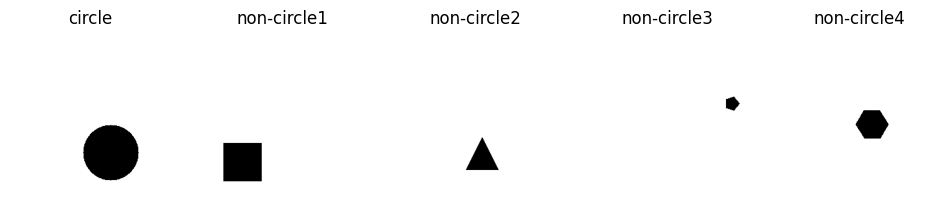

In [19]:

from PIL import Image
import matplotlib.pyplot as plt

# Define the folder where the images are saved
folder_name = "shapes_images"

# Define the shapes to be displayed
shapes = ["circle", "non-circle1", "non-circle2", "non-circle3", "non-circle4"]

# Define the figure and subplot settings
fig = plt.figure(figsize=(12, 6))
columns = 5
rows = 1

# Loop through the shapes and display an example of each
for i, shape in enumerate(shapes):
    # Find the path to the first image of the current shape
    shape_files = os.listdir(folder_name)
    shape_file = [file for file in shape_files if file.startswith(shape)][1]
    image_path = os.path.join(folder_name, shape_file)
    
    # Load the image
    image = Image.open(image_path)
    
    # Display the image with its label
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(image)
    ax.set_title(shape)
    ax.axis('off')

plt.show()


In [27]:
import os

folder_path = "/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/"
prefix = "non-circle"

count = 1
for filename in os.listdir(folder_path):
    if filename.startswith(prefix):
        src = folder_path + filename
        dst = folder_path + prefix + str(count) + filename[len(prefix):]
        os.rename(src, dst)
        count += 1


In [32]:
import os
import shutil

# specify the input folder path
input_folder = "/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/"

# specify the output subfolders for each category
output_folder_circle = "circle"
output_folder_non_circle = "non_circle"

# create the output subfolders if they don't exist
os.makedirs(output_folder_circle, exist_ok=True)
os.makedirs(output_folder_non_circle, exist_ok=True)

# iterate over all files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename starts with "circle"
    if filename.startswith("circle"):
        # move the file to the output subfolder for circle images
        shutil.move(os.path.join(input_folder, filename), output_folder_circle)
    # check if the filename starts with "non-circle"
    elif filename.startswith("non-circle"):
        # move the file to the output subfolder for non-circle images
        shutil.move(os.path.join(input_folder, filename), output_folder_non_circle)
    else:
        # ignore files that don't match either pattern
        pass


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/'

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the folders containing the images of circles and non-circles
circle_folder = '/Users/jgber/OneDrive/Desktop/shapegenerator/circle'
non_circle_folder = '/Users/jgber/OneDrive/Desktop/shapegenerator/non_circle'

# Create an empty list to store the images and their labels
data = []
labels = []

# Load the images from the circle folder and append them to the data list with a label of 0 (for circle)
for img_name in os.listdir(circle_folder):
    img_path = os.path.join(circle_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    data.append(img)
    labels.append(0)

# Load the images from the non-circle folder and append them to the data list with a label of 1 (for non-circle)
for img_name in os.listdir(non_circle_folder):
    img_path = os.path.join(non_circle_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    data.append(img)
    labels.append(1)

# Convert the data and labels lists to numpy arrays
data = np.array(data) / 255.0
labels = np.array(labels)

# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 50, 50, 1), y_train, epochs=10, validation_data=(X_test.reshape(-1, 50, 50, 1), y_test))


Epoch 1/10
63/63 [==============================] - 5s 56ms/step - loss: 0.4989 - accuracy: 0.7890 - val_loss: 0.4576 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 3s 50ms/step - loss: 0.3609 - accuracy: 0.8535 - val_loss: 0.2821 - val_accuracy: 0.8980
Epoch 3/10
63/63 [==============================] - 3s 50ms/step - loss: 0.2309 - accuracy: 0.9185 - val_loss: 0.2030 - val_accuracy: 0.9300
Epoch 4/10
63/63 [==============================] - 3s 50ms/step - loss: 0.2045 - accuracy: 0.9285 - val_loss: 0.1705 - val_accuracy: 0.9360
Epoch 5/10
63/63 [==============================] - 3s 50ms/step - loss: 0.1505 - accuracy: 0.9495 - val_loss: 0.1642 - val_accuracy: 0.9400
Epoch 6/10
63/63 [==============================] - 3s 49ms/step - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.1114 - val_accuracy: 0.9580
Epoch 7/10
63/63 [==============================] - 3s 51ms/step - loss: 0.1044 - accuracy: 0.9620 - val_loss: 0.1099 - val_accuracy: 0.9560
Epoch 8/10
63

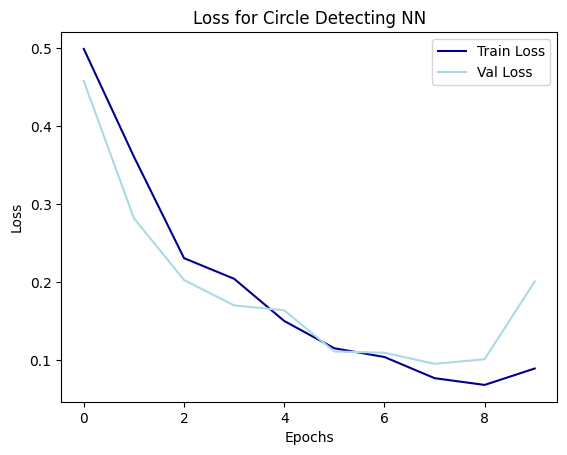

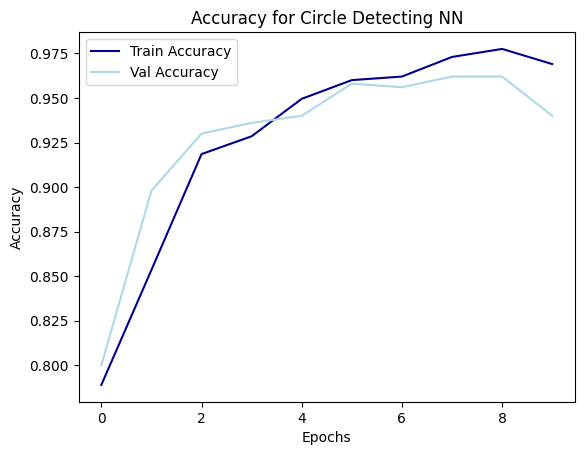

In [9]:
import matplotlib.pyplot as plt
# Save the node weights as an h5 file
model.save_weights('node_weights.h5')

# Train the model and save the history of the training
# Plot the loss function over epochs
plt.plot(history.history['loss'], label='Train Loss', color='darkblue')
plt.plot(history.history['val_loss'], label='Val Loss', color='lightblue')
plt.title('Loss for Circle Detecting NN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy function over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy', color='darkblue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='lightblue')
plt.title('Accuracy for Circle Detecting NN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
# Predict on the first five images in the test set
predictions = model.predict(X_test[:50].reshape(-1, 50, 50, 1))
predicted_labels = np.round(predictions).flatten()

# Display the predicted and actual labels for the first five images
for i in range(50):
    print(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")


2/2 [==============================] - 0s 12ms/step
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1